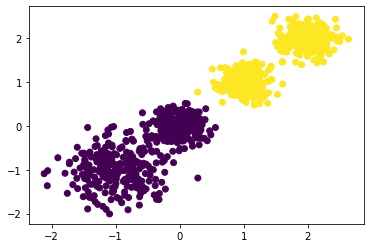

In [26]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

df = pd.read_csv('cluster1.csv')
df = df.dropna()
attribute = df.iloc[:,:].values.reshape(-1,2)
kmeans = KMeans(n_clusters=2, random_state=9).fit(attribute)
y_pred = kmeans.fit_predict(attribute)
plt.scatter(attribute[:, 0], attribute[:, 1], c=y_pred)
plt.show()

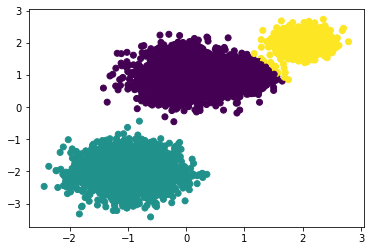

In [27]:
df = pd.read_csv('cluster_task1.csv')
df = df.dropna()
df.head()
attribute = df.iloc[:,:].values.reshape(-1,2)
kmeans = KMeans(n_clusters=3, random_state=9).fit(attribute)
y_pred = kmeans.fit_predict(attribute)
plt.scatter(attribute[:, 0], attribute[:, 1], c=y_pred)
plt.show()

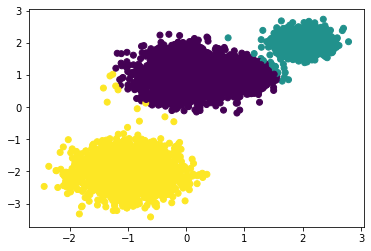

In [28]:
len_max = len(df.iloc[:, 0])
k = 3
centriod = []
cluster = {}
k_m = [0] * len_max
for i in range(0, 3):
    index = random.randint(0, len_max)
    aa0 = df.iloc[index, 0]
    aa1 = df.iloc[index, 1]
    centriod.append([aa0, aa1])
    cluster[i] = [[aa0, aa1]]
for j in range(0, len(df.iloc[:, 0])):
    nearest = 1000000
    choice = 0
    a0 = df.iloc[j, 0]
    a1 = df.iloc[j, 1]
    for k in range(0, 3):
        distance_sq = (a0 - centriod[k][0]) ** 2 + (a1 - centriod[k][1]) ** 2
        if nearest ** 2 > distance_sq:
            nearest = distance_sq
            choice = k
    cluster[choice].append([a0, a1])
    k_m[j] = choice
    length = 0
    for l in range(0, len(cluster[choice])):
        length += 1
        centriod[choice][0] += cluster[choice][l][0]
        centriod[choice][1] += cluster[choice][l][1]
    centriod[choice][0] /= length
    centriod[choice][1] /= length
plt.scatter(attribute[:, 0], attribute[:, 1], c=k_m)
plt.show()